<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/14_10_Challenege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats.mstats import winsorize
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [0]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
life0 = pd.read_sql_query('select * FROm lifeexpectancy',con=engine)
#educate= engine.execute('SELECT * FROM useducation')
engine.dispose()

In [0]:
life1=life0.copy()

In [0]:
life1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [0]:
life1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [0]:
len(list(life1))

22

In [0]:
life1['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [0]:
life1['Country'].nunique()

193

In [0]:
fill_list=list(life1)

In [0]:
fill_list

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [0]:
life1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

**Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.text**

**INTERPOLATION FOR MISSING VALUES**

In [0]:
fill_list=['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [0]:
countries = life1['Country'].unique()

for country in countries:
    life1.loc[life1["Country"] == country, fill_list] = life1.loc[life1["Country"] == country, fill_list].interpolate()

# we drop the null values after interpolation
life1.dropna(inplace=True)



In [0]:
life1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000


In [0]:
life1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**MISSING VALUES DONE**

**OUTLIERS**

**DISPLAY BOXPLOTS FOR ALL NUMERIC EXCEPT YEAR**

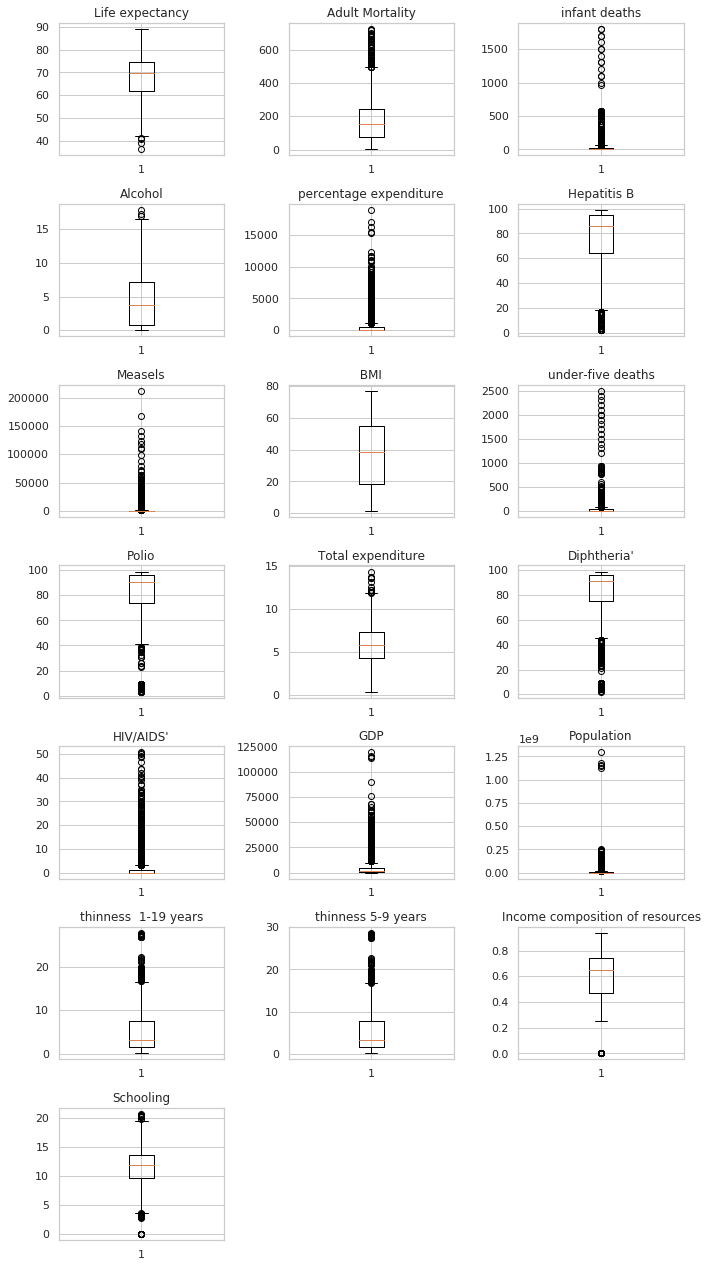

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.boxplot(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(life1['Schooling'])
plt.title("Schooling")


plt.tight_layout()
plt.show()


**MANY OUTLIERS**

**WILL WINSORIZE**

In [0]:
for col in fill_list:
  life1[col]=winsorize(life1[col],(0.03,.12))
                       


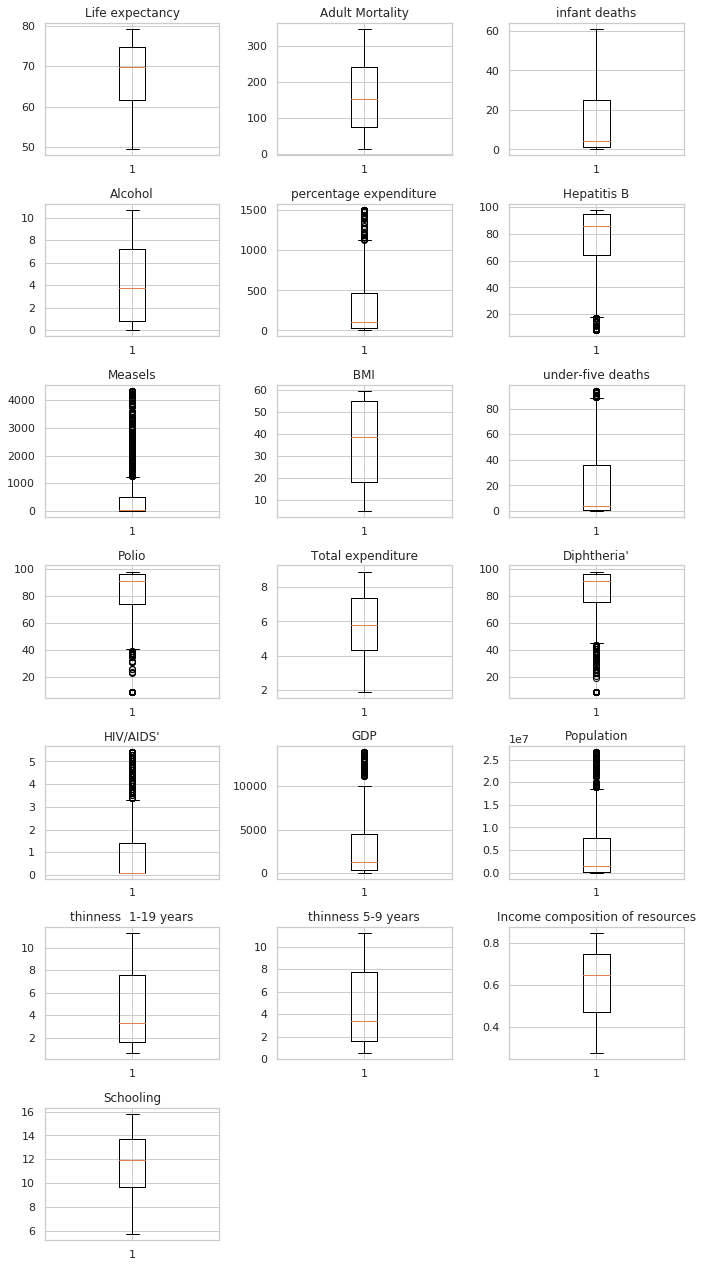

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(life1['Life expectancy '])
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(life1['Adult Mortality'])
plt.title("Adult Mortality")

plt.subplot(8,3,3)
plt.boxplot(life1['infant deaths'])
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(life1['Alcohol'])
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(life1['percentage expenditure'])
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(life1['Hepatitis B'])
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(life1['Measles '])
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(life1[' BMI '])
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(life1['under-five deaths '])
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(life1['Polio'])
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(life1['Total expenditure'])
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(life1['Diphtheria '])
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(life1[' HIV/AIDS'])
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(life1['GDP'])
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(life1['Population'])
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(life1[' thinness  1-19 years'])
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(life1[' thinness 5-9 years'])
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(life1['Income composition of resources'])
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(life1['Schooling'])
plt.title("Schooling")


plt.tight_layout()
plt.show()

**WILL TRY LOG TRANSFORMATION**

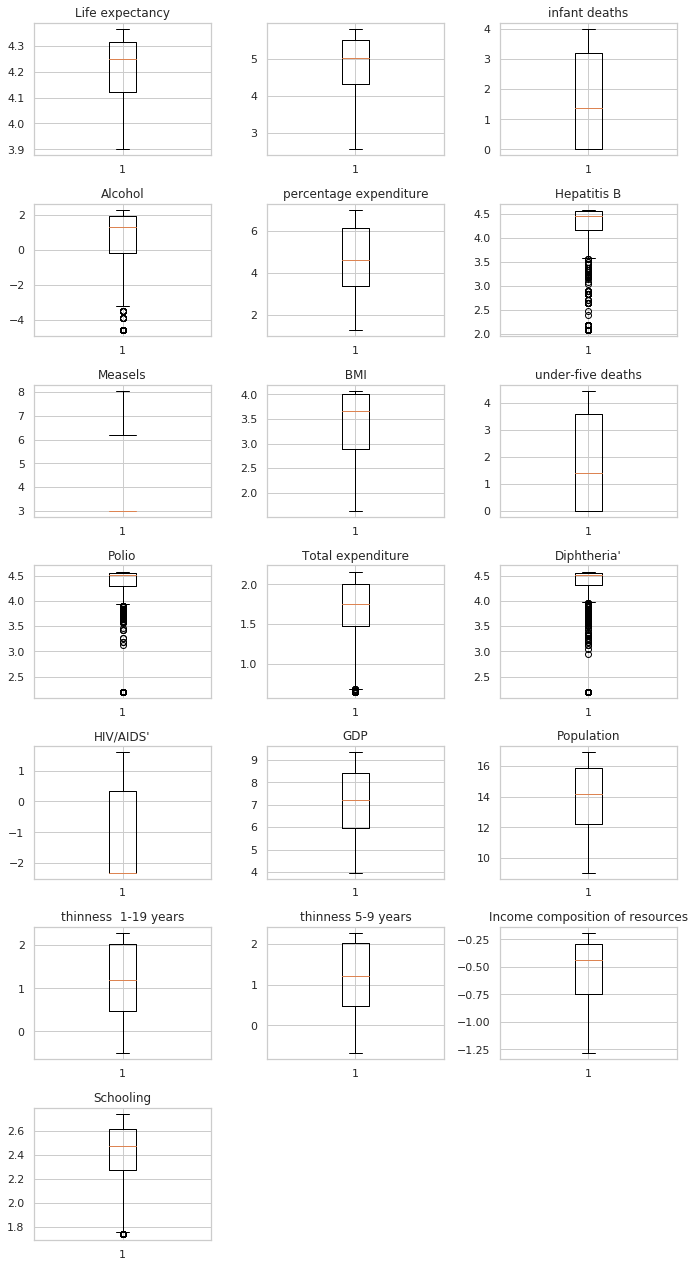

In [0]:
plt.figure(figsize=(10,20))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(8,3,1)
plt.boxplot(np.log(life1['Life expectancy ']))
plt.title("Life expectancy")

plt.subplot(8,3,2)
plt.boxplot(np.log(life1['Adult Mortality']))

plt.subplot(8,3,3)
plt.boxplot(np.log(life1['infant deaths']))
plt.title('infant deaths')

plt.subplot(8,3,4)
plt.boxplot(np.log(life1['Alcohol']))
plt.title("Alcohol")

plt.subplot(8,3,5)
plt.boxplot(np.log(life1['percentage expenditure']))
plt.title("percentage expenditure")

plt.subplot(8,3,6)
plt.boxplot(np.log(life1['Hepatitis B']))
plt.title("Hepatitis B")

plt.subplot(8,3,7)
plt.boxplot(np.log(life1['Measles ']))
plt.title("Measels")

plt.subplot(8,3,8)
plt.boxplot(np.log(life1[' BMI ']))
plt.title(" BMI ")

plt.subplot(8,3,9)
plt.boxplot(np.log(life1['under-five deaths ']))
plt.title("under-five deaths")

plt.subplot(8,3,10)
plt.boxplot(np.log(life1['Polio']))
plt.title("Polio")

plt.subplot(8,3,11)
plt.boxplot(np.log(life1['Total expenditure']))
plt.title("Total expenditure")

plt.subplot(8,3,12)
plt.boxplot(np.log(life1['Diphtheria ']))
plt.title("Diphtheria'")

plt.subplot(8,3,13)
plt.boxplot(np.log(life1[' HIV/AIDS']))
plt.title("HIV/AIDS'")

plt.subplot(8,3,14)
plt.boxplot(np.log(life1['GDP']))
plt.title("GDP")

plt.subplot(8,3,15)
plt.boxplot(np.log(life1['Population']))
plt.title("Population")

plt.subplot(8,3,16)
plt.boxplot(np.log(life1[' thinness  1-19 years']))
plt.title("thinness  1-19 years")

plt.subplot(8,3,17)
plt.boxplot(np.log(life1[' thinness 5-9 years']))
plt.title("thinness 5-9 years")

plt.subplot(8,3,18)
plt.boxplot(np.log(life1['Income composition of resources']))
plt.title("Income composition of resources")

plt.subplot(8,3,19)
plt.boxplot(np.log(life1['Schooling']))
plt.title("Schooling")

plt.tight_layout()
plt.show()
